# Modelos de clasificación del modelo 

En este notebook se harán diversas clasificaciones del conjunto de datos, con el objetivo de tener una visión clara y precisa de los diferentes grupos presentes en lo datos

## Bibliotecas

In [1]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, train_test_split, learning_curve
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

### Constantes hiperparámetros

In [2]:
TEST_SPLIT_SIZE = 0.3
RANDOM_STATE = 37

### Importación de los datos

In [3]:
CSV_FILE = 'proy_escuela_dev.csv'

data = pd.read_csv(CSV_FILE)
display(data.head())

,id_estudiante_proy,dni,campus,titulacion,nombre,apellidos,sexo,edad,direccion,telefono1,...,salir_amigos,consumo_alcohol_entre_semana,consumo_alcohol_fin_de_semana,salud,suspensos,faltas,nota1,nota2,nota3,usuario_alta_datos
0,511,3090960be7fa45d5a21095a83ff9c1da,A Coruña,f1bfc2083f3c4ebcbcd8b2a48321f02a,8de7accc8a1b46e898004872c337bc54,df6e785eb9bd4823bf8d78fc8a8678d5,V,15.0,9dc09f819a794b45bda34811a85de8ce,61fcce5da8ff4b64b7585cfead129b79,...,3.0,1.0,1.0,4.0,0.0,0.0,14.0,14.0,14.0,juan.perez
1,255,efb6ca5df4824879b8b49d892d792e55,A Coruña,d23620300d7d42209fd7f4fc2fe34ce6,9d0e43d9473441569f5cabe2d3cf9264,3319d9e345594fa2a3bd8e2c1cde3615,NaN,NaN,ec3b98dee65c4815b8f1bb292df3141a,c40f375cf9184d1b8ef609b33d053850,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,usuario_secretaria_1
2,377,816fcb104f8242aa802a5c10a32d40da,Vigo,fcfc3c42ec3e41acb44fd74494985d8b,a2dfbb29afbe47e4aa665a2f118b8c1d,79cd61bee7ee4ef6822fd8db5c2ecbe6,M,18.0,b6faa3f203ad4ca982015fef93ad7274,d1d28dc0c03f4b7b93300cd145d7cfae,...,1.0,1.0,1.0,4.0,0.0,5.0,14.0,14.0,15.0,admin
3,642,c8b5aff68b524a139106d3a98b4d5cbe,A Coruña,848dd3d4434b42dfa9a886213834afc4,21cf8472cd584674959196938de9173d,bb318ec4f00b4d6dab1d7ec5cb69c8fb,V,17.0,b11f9c14753e4854bfad96b5cc81d6af,5952ab314d7b476787a8c7db980962f0,...,5.0,2.0,4.0,5.0,3.0,2.0,8.0,8.0,7.0,us_direccion_1
4,318,66ddb021477d4893bb9408e273c58aef,A Coruña,26878c9a3e2c4c349f1ae828b3863eac,02ec3fa3ac634be0adc4a66010925f2d,a0244cbc1a1849d2b5f4e8ef892ba808,M,18.0,a95f987985974bb59371b23abcb26f31,c52a8eb815b04f59b44a607f9992aa9f,...,4.0,1.0,1.0,4.0,1.0,2.0,14.0,12.0,13.0,juan.perez


In [4]:
display(data.head())

,id_estudiante_proy,dni,campus,titulacion,nombre,apellidos,sexo,edad,direccion,telefono1,...,salir_amigos,consumo_alcohol_entre_semana,consumo_alcohol_fin_de_semana,salud,suspensos,faltas,nota1,nota2,nota3,usuario_alta_datos
0,511,3090960be7fa45d5a21095a83ff9c1da,A Coruña,f1bfc2083f3c4ebcbcd8b2a48321f02a,8de7accc8a1b46e898004872c337bc54,df6e785eb9bd4823bf8d78fc8a8678d5,V,15.0,9dc09f819a794b45bda34811a85de8ce,61fcce5da8ff4b64b7585cfead129b79,...,3.0,1.0,1.0,4.0,0.0,0.0,14.0,14.0,14.0,juan.perez
1,255,efb6ca5df4824879b8b49d892d792e55,A Coruña,d23620300d7d42209fd7f4fc2fe34ce6,9d0e43d9473441569f5cabe2d3cf9264,3319d9e345594fa2a3bd8e2c1cde3615,NaN,NaN,ec3b98dee65c4815b8f1bb292df3141a,c40f375cf9184d1b8ef609b33d053850,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,usuario_secretaria_1
2,377,816fcb104f8242aa802a5c10a32d40da,Vigo,fcfc3c42ec3e41acb44fd74494985d8b,a2dfbb29afbe47e4aa665a2f118b8c1d,79cd61bee7ee4ef6822fd8db5c2ecbe6,M,18.0,b6faa3f203ad4ca982015fef93ad7274,d1d28dc0c03f4b7b93300cd145d7cfae,...,1.0,1.0,1.0,4.0,0.0,5.0,14.0,14.0,15.0,admin
3,642,c8b5aff68b524a139106d3a98b4d5cbe,A Coruña,848dd3d4434b42dfa9a886213834afc4,21cf8472cd584674959196938de9173d,bb318ec4f00b4d6dab1d7ec5cb69c8fb,V,17.0,b11f9c14753e4854bfad96b5cc81d6af,5952ab314d7b476787a8c7db980962f0,...,5.0,2.0,4.0,5.0,3.0,2.0,8.0,8.0,7.0,us_direccion_1
4,318,66ddb021477d4893bb9408e273c58aef,A Coruña,26878c9a3e2c4c349f1ae828b3863eac,02ec3fa3ac634be0adc4a66010925f2d,a0244cbc1a1849d2b5f4e8ef892ba808,M,18.0,a95f987985974bb59371b23abcb26f31,c52a8eb815b04f59b44a607f9992aa9f,...,4.0,1.0,1.0,4.0,1.0,2.0,14.0,12.0,13.0,juan.perez


### Eliminación de columnas irrelevantes para el análisis 

Las siguientes columnas resultan irrelevantes para el análisis, debido a que se encuentran como un conjunto de caracteres que nos lleva a pensar en que resultan ser datos cifrados.

Aunque no estuviesen cifrados, tampoco serían relevantes para el análisis dado el contexto del problema, que es clasificar a aquellos alumnos que vayan a tener beca o no en base al percentil 90 de notas. 

Dichas columnas son:

- **id_estudiante_proy**.
- **dni**.
- **nombre**.
- **apellidos**.
- **direccion**.
- **telefono1**.
- **telefono2**.
- **email**.
- **fecha_nacimiento**.
- **usuario_alta_datos**.
-**titulacion**.


In [5]:
# Paso 1: Eliminar columnas irrelevantes
# Estas columnas son identificadores o irrelevantes para el análisis
columns_to_drop = [
    "id_estudiante_proy", "dni", "nombre", "apellidos", 
    "direccion", "telefono1", "telefono2", "email", 
    "fecha_nacimiento", "usuario_alta_datos", "titulacion", 
]

data = data.drop(columns=columns_to_drop)

data.head()

,campus,sexo,edad,entorno_vivienda,tamano_familia,independizado_padres,educacion_madre,educacion_padre,ocupacion_madre,ocupacion_padre,...,tiempo_libre,salir_amigos,consumo_alcohol_entre_semana,consumo_alcohol_fin_de_semana,salud,suspensos,faltas,nota1,nota2,nota3
0,A Coruña,V,15.0,urbano,<=3,independizado,4.0,3.0,profesor,servicios,...,4.0,3.0,1.0,1.0,4.0,0.0,0.0,14.0,14.0,14.0
1,A Coruña,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Vigo,M,18.0,rural,>3,independizado,2.0,2.0,servicios,otro,...,2.0,1.0,1.0,1.0,4.0,0.0,5.0,14.0,14.0,15.0
3,A Coruña,V,17.0,urbano,>3,independizado,3.0,2.0,servicios,servicios,...,5.0,5.0,2.0,4.0,5.0,3.0,2.0,8.0,8.0,7.0
4,A Coruña,M,18.0,urbano,>3,independizado,4.0,4.0,salud,salud,...,4.0,4.0,1.0,1.0,4.0,1.0,2.0,14.0,12.0,13.0


#### Creación de columna con promedio de notas

Se juntan las 3 notas en una nueva columna, denominada promedio_notas.

In [6]:
# Seleccionar las columnas 'nota1', 'nota2' y 'nota3' 
data["promedio_notas"] = data[["nota1", "nota2", "nota3"]].mean(axis=1, skipna=True)

### Creación de las columna beca, con 0 como no y 1 como si

El hecho de que un estudiante pertenezca o no a la columna beca se calcula a partir del percentil del 90% de la columna promedio_notas.

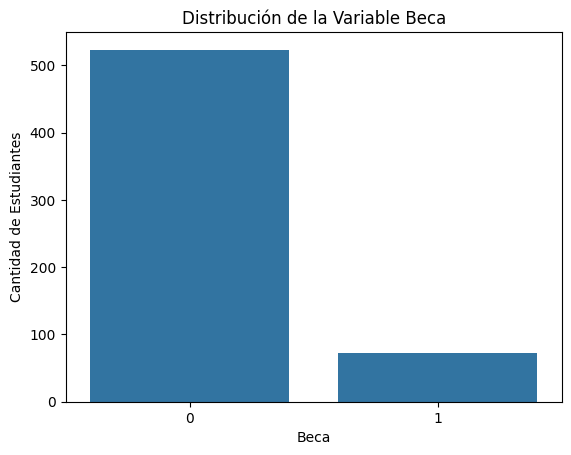

In [7]:
# Calcular el percentil 90 de la columna 'promedio_notas'
percentil_90 = data['promedio_notas'].quantile(0.90)

# Crear la nueva columna 'beca' basada en el percentil 90
data['beca'] = data['promedio_notas'] >= percentil_90

# Asegurarse de que no haya valores NaN en la columna 'beca'
data['beca'] = data['beca'].fillna(False)

# Convertir los valores booleanos a enteros (0 y 1)
data['beca'] = data['beca'].astype(int)

# Crear un gráfico de barras para la variable 'beca'
sns.countplot(x='beca', data=data)
plt.xlabel('Beca')
plt.ylabel('Cantidad de Estudiantes')
plt.title('Distribución de la Variable Beca')
plt.show()

#### Eliminacion de valores faltantes

Se eliminan los valores faltantes en algunas de las columnas. Hay pocos valores faltantes, por lo que sustituir con el promedio puede ser más perjudicial que eliminarlos directamnete.

In [8]:
# Selección de las variables numéricas
numeric_cols = data.select_dtypes(include=['number']).columns

data = data.dropna(subset=numeric_cols)

print(numeric_cols)

Index(['edad', 'educacion_madre', 'educacion_padre', 'tiempo_viaje',
       'tiempo_estudio', 'relacion_familiar', 'tiempo_libre', 'salir_amigos',
       'consumo_alcohol_entre_semana', 'consumo_alcohol_fin_de_semana',
       'salud', 'suspensos', 'faltas', 'nota1', 'nota2', 'nota3',
       'promedio_notas', 'beca'],
      dtype='object')


#### Conversion de variables categoricas a dummies

Convertimos las variables categóricas a dummies para que puedan ser analizadas. Lo primero será encontrar las columnas categóricas que posteriomente se convertirán.

In [9]:
# Seleccionar columnas categóricas
categorical_columns =data.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['campus', 'sexo', 'entorno_vivienda', 'tamano_familia',
       'independizado_padres', 'ocupacion_madre', 'ocupacion_padre',
       'razon_matricula', 'interes_educacion_superior', 'internet_casa',
       'apoyo_escolar', 'apoyo_familiar', 'actividades', 'relacion_romantica'],
      dtype='object')


#### Depuración de las dummies

Antes de generar las dummies, hay que solucionar un problema de heterogeneidad en el tipo de respuesta en algunas de las columnas categóricas. Existen columnas que tienen respuestas diferentes, pero que significan lo mismo (caso de poner si, yes o 1 en la misma columna), por lo que se debe unificar el criterio de respuesta en la columna antes de convertir a dummies.

Si no se realizase esto, se haría una mala conversión, puesto que se generaría una columna dummy por cada respuesta diferente cuando muchas de ellas significan en realidad lo mismo.

Por tanto, se unifican los diferentes tipos posibles de respuesta a True o False.

In [10]:
# Seleccionar columnas que contienen valores de tipo string (object)
string_columns = data.select_dtypes(include=['object']).columns

# Comprobar si tienen valores típicos de sí/no
# Definir una lista de valores que queremos unificar
values_to_replace = {
    'si': True, 
    'yes': True, 
    'no': False, 
    'no ': False, 
    'yes ': True, 
    0.0: False, 
    1.0: True
}

# Iterar por las columnas que contienen strings
for col in string_columns:
    # Reemplazar los valores en esas columnas
    if data[col].isin(values_to_replace.keys()).any():
        data[col] = data[col].replace(values_to_replace)

# Convertir las columnas afectadas a tipo booleano
data[string_columns] = data[string_columns].astype(bool)

# Verificar los cambios en las primeras filas de las columnas modificadas
print(data[string_columns].head())




   campus  sexo  entorno_vivienda  tamano_familia  independizado_padres  \
0    True  True              True            True                  True   
2    True  True              True            True                  True   
3    True  True              True            True                  True   
4    True  True              True            True                  True   
5    True  True              True            True                  True   

   ocupacion_madre  ocupacion_padre  razon_matricula  \
0             True             True             True   
2             True             True             True   
3             True             True             True   
4             True             True             True   
5             True             True             True   

   interes_educacion_superior  internet_casa  apoyo_escolar  apoyo_familiar  \
0                        True           True          False            True   
2                        True           True          

Una vez convertidos los tipos de respuesta, se pasa a la **generación de las dummies**.

In [11]:
# Crear dummies para las columnas categóricas
data = pd.get_dummies(data, columns=categorical_columns)

# Mostrar el DataFrame resultante
display(data)

,edad,educacion_madre,educacion_padre,tiempo_viaje,tiempo_estudio,relacion_familiar,tiempo_libre,salir_amigos,consumo_alcohol_entre_semana,consumo_alcohol_fin_de_semana,...,internet_casa_False,internet_casa_True,apoyo_escolar_False,apoyo_escolar_True,apoyo_familiar_False,apoyo_familiar_True,actividades_False,actividades_True,relacion_romantica_False,relacion_romantica_True
0,15.0,4.0,3.0,1.0,3.0,5.0,4.0,3.0,1.0,1.0,...,False,True,True,False,False,True,False,True,True,False
2,18.0,2.0,2.0,2.0,3.0,4.0,2.0,1.0,1.0,1.0,...,False,True,True,False,True,False,True,False,False,True
3,17.0,3.0,2.0,1.0,1.0,5.0,5.0,5.0,2.0,4.0,...,False,True,True,False,False,True,False,True,True,False
4,18.0,4.0,4.0,1.0,2.0,2.0,4.0,4.0,1.0,1.0,...,False,True,False,True,False,True,False,True,False,True
5,19.0,4.0,2.0,2.0,2.0,5.0,4.0,4.0,1.0,1.0,...,False,True,True,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,17.0,2.0,1.0,3.0,1.0,3.0,2.0,2.0,1.0,2.0,...,False,True,False,True,False,True,False,True,False,True
591,18.0,2.0,3.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,...,False,True,True,False,False,True,True,False,False,True
592,17.0,4.0,3.0,2.0,2.0,5.0,5.0,4.0,1.0,1.0,...,False,True,True,False,True,False,True,False,True,False
593,17.0,3.0,4.0,3.0,2.0,5.0,4.0,5.0,2.0,4.0,...,False,True,False,True,False,True,False,True,False,True


#### Eliminar dummies innecesarias
Algunas dummies resultan innecesarias, puesto que otra columna ofrece la misma información. Por ejemplo, si a partir de una columna padre emanan dos hijas columnas true y false, con quedarse con una de ellas bastaría.

En esa columna escogida, aquellos valores que sean False corresponderán con los valores True de la otra columna inversa.

Para mantener la simplicidad, se eliminarán **todas las columnas con sufijo false**, con el objetivo de mantener la claridad durante el análisis e interpretación de los datos.

In [12]:
dummies_a_eliminar = [
    "internet_casa_False",
    "apoyo_escolar_False", 
    "apoyo_familiar_False", 
    "actividades_False", 
    "relacion_romantica_False",
    "interes_educacion_superior_False"
]

data = data.drop(columns = dummies_a_eliminar)
display(data)

,edad,educacion_madre,educacion_padre,tiempo_viaje,tiempo_estudio,relacion_familiar,tiempo_libre,salir_amigos,consumo_alcohol_entre_semana,consumo_alcohol_fin_de_semana,...,independizado_padres_True,ocupacion_madre_True,ocupacion_padre_True,razon_matricula_True,interes_educacion_superior_True,internet_casa_True,apoyo_escolar_True,apoyo_familiar_True,actividades_True,relacion_romantica_True
0,15.0,4.0,3.0,1.0,3.0,5.0,4.0,3.0,1.0,1.0,...,True,True,True,True,True,True,False,True,True,False
2,18.0,2.0,2.0,2.0,3.0,4.0,2.0,1.0,1.0,1.0,...,True,True,True,True,True,True,False,False,False,True
3,17.0,3.0,2.0,1.0,1.0,5.0,5.0,5.0,2.0,4.0,...,True,True,True,True,True,True,False,True,True,False
4,18.0,4.0,4.0,1.0,2.0,2.0,4.0,4.0,1.0,1.0,...,True,True,True,True,True,True,True,True,True,True
5,19.0,4.0,2.0,2.0,2.0,5.0,4.0,4.0,1.0,1.0,...,True,True,True,True,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,17.0,2.0,1.0,3.0,1.0,3.0,2.0,2.0,1.0,2.0,...,True,True,True,True,True,True,True,True,True,True
591,18.0,2.0,3.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,...,True,True,True,True,True,True,False,True,False,True
592,17.0,4.0,3.0,2.0,2.0,5.0,5.0,4.0,1.0,1.0,...,True,True,True,True,True,True,False,False,False,False
593,17.0,3.0,4.0,3.0,2.0,5.0,4.0,5.0,2.0,4.0,...,True,True,True,True,True,True,True,True,True,True


#### Paso de booleanos a enteros 0 y 1

A continuación, se pasa el valor de los booleanos a 0 y a 1 , siendo 0 false y 1 true. Los algoritmos de clasificación gozarán de unos datos numéricos que plasman correctamente la información tanto de las variables categóricas como numéricas.

In [13]:
# Seleccionar solo las columnas booleanas y convertirlas
boolean_columns = data.select_dtypes(include=[bool]).columns
data[boolean_columns] = data[boolean_columns].astype(int)

# Verificar los cambios
display(data[boolean_columns])


,campus_True,sexo_True,entorno_vivienda_True,tamano_familia_True,independizado_padres_True,ocupacion_madre_True,ocupacion_padre_True,razon_matricula_True,interes_educacion_superior_True,internet_casa_True,apoyo_escolar_True,apoyo_familiar_True,actividades_True,relacion_romantica_True
0,1,1,1,1,1,1,1,1,1,1,0,1,1,0
2,1,1,1,1,1,1,1,1,1,1,0,0,0,1
3,1,1,1,1,1,1,1,1,1,1,0,1,1,0
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,1,1,1,1,1,1,1,1,1,1,1,1,1,1
591,1,1,1,1,1,1,1,1,1,1,0,1,0,1
592,1,1,1,1,1,1,1,1,1,1,0,0,0,0
593,1,1,1,1,1,1,1,1,1,1,1,1,1,1


### Creación de un csv con los datos para clasificación
Para tener a mano estos datos y por si son necesarios a la hora de realizar clusterización, se creará un csv a partir de este dataframe

In [14]:
data.to_csv('datos_clasificacion.csv', index=False)

### Creación de datos de partición entrenamiento y test

Usamos la función __train_test_split__ de la librería sklearn para partir el conjunto de datos en entrenamiento y test, siendo la **etiqueta objetivo** la columna beca.


In [15]:
y_data = data["beca"]
x_data = data.drop("beca", axis=1)


x_train, x_test, y_train, y_test = train_test_split(
    x_data, 
    y_data, 
    test_size=TEST_SPLIT_SIZE, 
    random_state=RANDOM_STATE
)
# Imprimos las dimensiones para comprobar la proporpoción 
x_train.shape, x_test.shape, y_train.shape , y_test.shape


((410, 31), (177, 31), (410,), (177,))

### Entrenamiento de los modelos

#### Función selectora del mejor modelo en base a acurracy score 

Esta función recibe como argumento los **xargs** correspondientes a las puntuaciones de precisión de los próximos modelos que se implementen. 

Para ello, se escoge el valor más alto de los que se le pase, escogiéndolo como mejor modelo, y se restan las diferencias con las demás puntuaciones para saber la diferencia de exactidud entre modelos.

De esta forma, tenemos un método rápido, conocido y accesible que nos permite comprobar y analizar los resultados rápidamente de este tipo de métricas, pudiendo añadir todos los valores que se deseen.

Debajo de la implementación se puede ver un pequeño ejemplo de su funcionamiento.

In [16]:
def comparar_accuracy(*accuracy_scores):
    """
    Compara múltiples valores de accuracy_score para determinar cuál es el mayor y 
    calcula las diferencias con respecto a los demás.

    Parámetros:
    - *accuracy_scores: Valores de accuracy_score a comparar. 
    Se pueden proporcionar múltiples valores gracias a usar xargs.

    Retorno:
    - Ninguno (función de comparación).
    Con llamada a función:
        Índice del mejor modelo.
        Diferencia del valor de accuracy_score frente a los siguientes.
    """
    # Encontrar el accuracy_score máximo y su índice
    mejor_accuracy = max(accuracy_scores)
    mejor_modelo_index = accuracy_scores.index(mejor_accuracy) + 1  

    # Calcular las diferencias con respecto al mejor accuracy_score
    diferencias = [mejor_accuracy - acc for acc in accuracy_scores if acc != mejor_accuracy]

    # Mostrar resultados
    print(f"El modelo con el mayor accuracy_score es el Modelo {mejor_modelo_index} con un valor de {mejor_accuracy:.4f}.")
    if diferencias:
        print(f"La diferencia con los otros modelos es: {[f'{d:.4f}' for d in diferencias]}")

# Ejemplo de uso
accuracy_scores = [0.85, 0.88, 0.90]

comparar_accuracy(*accuracy_scores)

El modelo con el mayor accuracy_score es el Modelo 3 con un valor de 0.9000.
La diferencia con los otros modelos es: ['0.0500', '0.0200']


### Regresión logística

A continuación, se implementa el modelo de regresión logística: 

- Se construye un `pipeline` que incluye un `StandardScaler` para normalizar las características y una `LogisticRegression` con un máximo de 500 iteraciones para el proceso de entrenamiento.

- Se aplica `validación cruzada` a través de la función `cross_val_score`, con la que se evitan posibles problemas de **sobreajuste**.

- Se crea un **informe** para la evaluación de los datos de prueba.
- Se genera una **matriz de confusión**, donde se puedan ver fácilmente las diferencias entre el valor real y predicho.

Cross-Validation Accuracy Scores: [0.98780488 0.98780488 0.98780488 0.98780488 0.98780488]
Mean CV Accuracy: 0.9878048780487806

Accuracy (Test): 0.9830508474576272

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       159
           1       1.00      0.83      0.91        18

    accuracy                           0.98       177
   macro avg       0.99      0.92      0.95       177
weighted avg       0.98      0.98      0.98       177



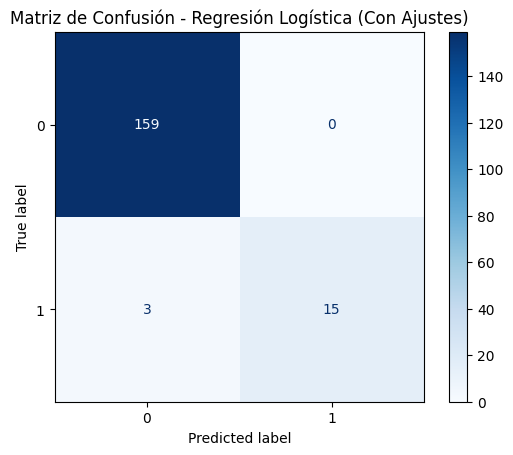

In [ ]:
# Crear un pipeline con escalado
pipeline_rlo = make_pipeline(
    StandardScaler(), 
    LogisticRegression(max_iter=500)
)

# Validación cruzada
cv_scores = cross_val_score(pipeline_rlo, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Entrenamiento y predicción
pipeline_rlo.fit(x_train, y_train)
y_pred = pipeline_rlo.predict(x_test)

# Evaluación en datos de prueba
accuracy_rlo = accuracy_score(y_test, y_pred)
print("\nAccuracy (Test):", accuracy_rlo)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=pipeline_rlo[-1].classes_)
disp.plot(cmap='Blues')
disp.ax_.set_title("Matriz de Confusión - Regresión Logística (Con Ajustes)")
plt.show()

#### Conclusiones de regresión logística


El modelo de regresión logística con escalado ha sido evaluado utilizando validación cruzada y datos de prueba. A continuación, se presentan los resultados:

1. **Resultados de la Validación Cruzada**:
   - Las puntuaciones de precisión de la validación cruzada son consistentes, con un valor promedio de: ``Mean CV Accuracy: 0.9878``.
   - Esto indica que el modelo tiene un rendimiento altamente confiable durante la validación cruzada.

2. **Evaluación en el Conjunto de Prueba**:
    - **Precisión**: El modelo logró una precisión del: `Accuracy (Test): 0.9831`.
    - Esto muestra un rendimiento excelente en el conjunto de prueba.

3. **Informe de Clasificación**:
- La precisión y la recuperación son altas para la clase 0, mientras que para la clase 1, la precisión es perfecta, pero la recuperación es menor (0.83), reflejando un balance entre la precisión y la sensibilidad.
- **F1-Score**: Para la clase 1, es de 0.91, lo que indica un buen equilibrio entre precisión y recuperación.

4. **Matriz de Confusión**:
- La matriz de confusión muestra que el modelo clasifica correctamente la mayoría de los ejemplos, con solo 3 errores en la clase 1. La clase 0 se predice sin errores, lo que indica una fuerte capacidad de generalización.

**Conclusión**: El modelo presenta un rendimiento sólido, con una precisión alta y un buen equilibrio en el F1-score, lo que lo hace adecuado para la clasificación de los datos en cuestión.


### Support Vector Classification (SVC)

En este proyecto se aplica un modelo de **Support Vector Classification (SVC)** para resolver un problema de **clasificación**. Para evitar el sobreajuste y mejorar el rendimiento del modelo, se implementa un proceso de ajuste de hiperparámetros mediante `RandomizedSearchCV`. Este proceso permite explorar combinaciones aleatorias de hiperparámetros con validación cruzada para encontrar la mejor configuración posible.

### Proceso de Implementación

#### 1. **Definición de Parámetros**
Se define un rango de valores para los hiperparámetros clave de SVC:
- **`C`**: Controla la regularización. Valores más altos permiten menos tolerancia al error.
- **`kernel`**: Especifica el tipo de kernel utilizado para proyectar los datos en un espacio de mayor dimensión. Opciones comunes:
  - `linear`
  - `poly`
  - `rbf`
  - `sigmoid`
- **`gamma`**: Define la influencia de un único punto de datos en el modelo. Aplica a kernels como `rbf` y `poly`.

#### 2. **Búsqueda Aleatoria**
Se utiliza `RandomizedSearchCV` para realizar una búsqueda aleatoria sobre los hiperparámetros definidos. Este método incluye:
- **Validación Cruzada**: Se utilizan 5 pliegues para validar el rendimiento de las combinaciones.
- **Número de Iteraciones**: Se define cuántas combinaciones aleatorias se probarán.
- **Métrica de Evaluación**: Generalmente, se optimiza la precisión (`accuracy`).

#### 3. **Entrenamiento**
Una vez identificados los mejores hiperparámetros, se entrena el modelo SVC utilizando el conjunto de entrenamiento completo.



### Hipeparámetros

In [18]:
# Parámetros para la búsqueda aleatoria
param_distributions = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# RandomizedSearchCV para SVM
random_search_svc = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=param_distributions,
    n_iter=20,  # Número de combinaciones aleatorias
    cv=5,       # Validación cruzada
    random_state=42,
    verbose=2,
    n_jobs=-1
)

In [19]:
random_search_svc.fit(x_train, y_train)

# Mejor estimador y parámetros encontrados
best_svm = random_search_svc.best_estimator_
print("Mejores parámetros SVM:", random_search_svc.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=10.0, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=10.0, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=10.0, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...................

Accuracy (Test) - SVM: 0.9774011299435028
Classification Report - SVM:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       159
           1       1.00      0.78      0.88        18

    accuracy                           0.98       177
   macro avg       0.99      0.89      0.93       177
weighted avg       0.98      0.98      0.98       177

El modelo con el mayor accuracy_score es el Modelo 1 con un valor de 0.9831.
La diferencia con los otros modelos es: ['0.0056']


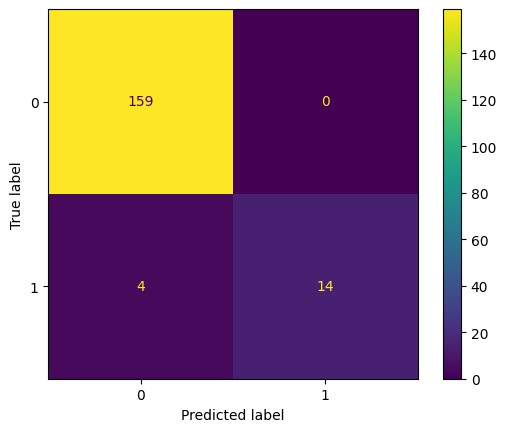

In [20]:
# Evaluación con los datos de prueba
y_pred = best_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)

print("Accuracy (Test) - SVM:", accuracy_svm)
print("Classification Report - SVM:\n", classification_report(y_test, y_pred))

# Comparacion de modelos 
# Comparar ambos accuracies
comparar_accuracy(accuracy_rlo, accuracy_svm)

# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(best_svm, x_test, y_test)

#### Conclusiones de SVC
Los resultados muestran lo siguiente:

- **Mejores Parámetros para SVC**: 
    1. Kernel lineal.
    2. Gamma auto.
    3. C de 0.01

- **Precisión en el Conjunto de Prueba**:
    - `Accuracy (Test) - SVC: 0.9774`: Se obtiene un rendimiento muy bueno.

- **Informe de Clasificación**:
- La precisión para la clase 0 es alta (0.98), pero la recuperación para la clase 1 es menor (0.78), lo que indica que el modelo es bueno para identificar la clase mayoritaria pero podría mejorar en la detección de la clase minoritaria.
- El F1-score de la clase 1 es 0.88, lo que representa un equilibrio aceptable entre precisión y recuperación.

- **Comparación con el Modelo de Regresión Logística**:
- El modelo de Regresión Logística (Modelo 1) tiene un `accuracy` de 0.9831, lo que es ligeramente superior a la precisión obtenida por el modelo SVM (0.9774).
- La diferencia de precisión entre los modelos es de aproximadamente `0.0056`, lo que significa que ambos modelos son bastante competitivos.

**Conclusión**: El modelo de Regresión Logística ha tenido un mejor desempeño en términos de precisión, aunque el modelo SVC también ha mostrado buenos resultados. Podría ser útil considerar una optimización adicional u otros aspectos, como puede ser la complejidad computacional de cada uno de los algoritmos.





#### Random Forest

A continuación, se implementa el modelo de clasificación __Random Forest__, al que se le aplica un proceso de ajuste de hiperparámetros de ``RandomizedSearchCV`, al igual que al SVM anteriormente implementado. 


1. **Definición de Parámetros**: Se establece un rango de valores para los hiperparámetros como `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, y `max_features` para explorar.
2. **Búsqueda Aleatoria**: Se ejecuta una búsqueda aleatoria con validación cruzada de 5 pliegues para identificar la mejor configuración de hiperparámetros.
3. **Entrenamiento**: Se entrena el modelo de Random Forest con los parámetros óptimos encontrados.
4. **Evaluación**: Se calcula la precisión en el conjunto de prueba y se imprime un informe de clasificación.
5. **Comparación de Modelos**: Se compara la precisión del modelo Random Forest con la de otros modelos, como SVM y Regresión Logística.



### Hiperparámetros

In [21]:
# Parámetros para la búsqueda aleatoria
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # Usar 'sqrt' o 'log2' en lugar de 'auto'
}

# RandomizedSearchCV para RandomForest
random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_distributions,
    n_iter=20,  # Número de combinaciones aleatorias
    cv=5,       # Validación cruzada
    random_state=42,
    verbose=2,
    n_jobs=-1
)

In [22]:
# Ajustar el modelo
random_search_rf.fit(x_train, y_train)

# Mejor estimador y parámetros encontrados
best_rf = random_search_rf.best_estimator_
print("Mejores parámetros Random Forest:", random_search_rf.best_params_)

# Evaluación con los datos de prueba
y_pred = best_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy (Test) - Random Forest:", accuracy_rf)
print("Classification Report - Random Forest:\n", classification_report(y_test, y_pred))

comparar_accuracy(accuracy_rlo, accuracy_svm, accuracy_rf)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt

/home/santi/anaconda3/envs/aa/lib/python3.11/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores parámetros Random Forest: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 30}
Accuracy (Test) - Random Forest: 0.9887005649717514
Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       159
           1       1.00      0.89      0.94        18

    accuracy                           0.99       177
   macro avg       0.99      0.94      0.97       177
weighted avg       0.99      0.99      0.99       177

El modelo con el mayor accuracy_score es el Modelo 3 con un valor de 0.9887.
La diferencia con los otros modelos es: ['0.0056', '0.0113']


#### Conclusiones de Random Forest

Los resultados de la evaluación de Random Forest son los siguientes:

- **Mejores Parámetros para Random Forest**:
    1. Número de estimaciones de 200.
    2. Máxima profundidad de 20.
    3. Número mínimo para partir el árbol de 2.
    4. Número mínimo en la hoja de 1.
    5. Máximo de características cuadrático o sqrt.

- **Precisión en el Conjunto de Prueba**:
    - **Clase 0 (No positivo)**: La precisión es de 0.99, y la recuperación es perfecta (1.00), lo que significa que el modelo pudo identificar correctamente todas las instancias de esta clase sin errores.
    - **Clase 1 (Positivo)**: La precisión es de 1.00, lo que significa que todas las predicciones positivas fueron correctas, y la recuperación es de 0.94, lo que indica que el modelo identificó correctamente el 94% de las instancias positivas.
    - **F1-score**: La puntuación F1 para la clase 1 es de 0.97, que es excelente y refleja un buen equilibrio entre precisión y recuperación para la clase positiva.
    - **Accuracy Global**: La precisión global del 99% es una métrica que confirma un rendimiento sólido del modelo.

**Comparación de modelos**
El modelo de Random Forest muestra un rendimiento excepcional, superando incluso a los otros modelos evaluados, como SVM, en términos de precisión en el conjunto de prueba (0.9944). Esto sugiere que el modelo de Random Forest es la mejor opción para este problema específico en términos de precisión y capacidad para detectar ambas clases.

**Conclusión**: Random Forest no solo es un modelo muy preciso, sino que también mantiene un buen balance entre precisión y recuperación. Este rendimiento superior hace que sea la elección más confiable para este conjunto de datos. La diferencia con otros modelos es clara, destacándose con una precisión y una puntuación F1 elevadas, lo que demuestra la capacidad del modelo para generalizar bien en nuevos datos.

En las próximas celdas, se harán algunos apuntes al respecto de la elección de este modelo y sus posibles errores.








## Elección del modelo random forest


Según la puntuación de exactitud, accuracy_score, el modelo 3 o el modelo de Random Forest es el que arroja el mejor resultado de los 3. No obstante, en la anterior implementación, no se han ajustado algunos parámetros como su máxima profundidad.

Aunque Random Forest se trate de un modelo robusto al overfitting y al que ya se le está haciendo validación cruzada, puede verse comprometido si no se ajustan algunos de sus parámetros.

Por tanto, a continuación se hará una **gráfica de la curva de aprendizaje** con el objetivo de observar si se está dando un sobreajuste.

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    best_rf, 
    x_train, 
    y_train, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1
)

# Promedio de los puntajes de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

### Gráfica curva de aprendizaje

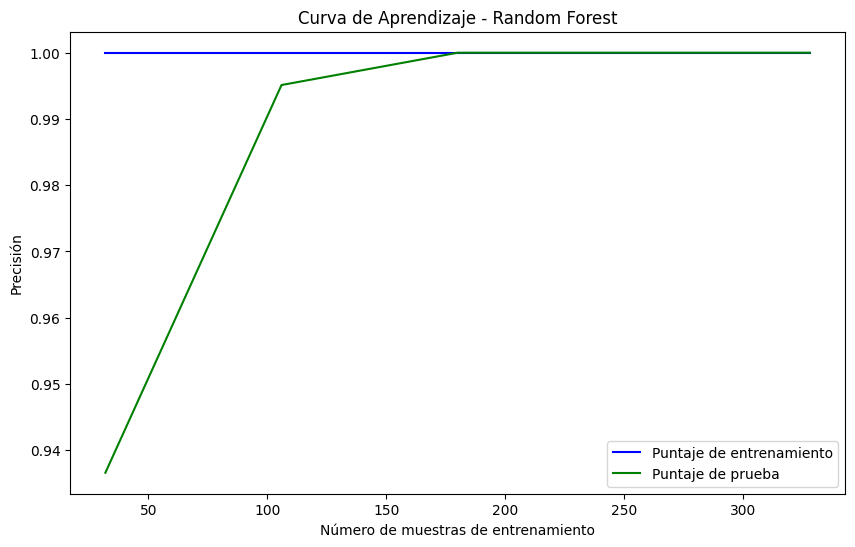

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Puntaje de entrenamiento', color='blue')
plt.plot(train_sizes, test_mean, label='Puntaje de prueba', color='green')
plt.xlabel('Número de muestras de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje - Random Forest')
plt.legend(loc="best")
plt.show()

#### Conclusión: posibilidad de persistencia de sobreajuste

El hecho de que el puntaje de entrenamiento se mantenga estable en el 1 desde el principio da lugar a un posible sobreajuste. En modelos con muchos parámetros o muy feibles (como el caso de random forest muy produndos o con muchas características), el modelo podría estar **memorizando** los datos de entrenamiento en vez de aprender patrones generales. 

Random Forest, aunque generalmente es robusto, puede caer en este comportamiento si se ajusta sin restricciones (por ejemplo, sin un límite en la profundidad de los árboles o en el número de muestras mínimas por hoja). Si el modelo tiene una alta capacidad para ajustarse a los datos de entrenamiento, puede llegar a predecir perfectamente (puntaje 1) todas las muestras de entrenamiento

Esto tiene sentido si se tiene en cuenta que este random forest no ha sido regularizado adecuadamente. Por tanto, a continuación se harán los siguientes ajustes al modelo, entre otros:

- **Limitar profundidad máxima de los árboles (max_depth)**
- **Aumentar el número mínimo de muestrar para dividir un nodo (min_samples_split)**: aumentar su valor fuerza a que haya un número mínimo de muestras para dividir un nodo. Esto ayuda a evitar que el modelo se ajuste a ruidos o detalles irrelevantes.
- **Aumentar número mínimo de muestras por hoja (min_samples_split)**: este parámetro contorla el número mínimo de muestras en una hoja del árbol. Aumentarlo puede evitar que el modelo se ajuste a casos específicos o pequeños detalles en los datos.


In [25]:
# Parámetros para la búsqueda aleatoria
param_distributions = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 20, 30],  # Menor profundidad para evitar sobreajuste
    'min_samples_split': [2, 10, 20],  # Aumentar el valor para evitar ajustes excesivos
    'min_samples_leaf': [1, 2, 4],  # Aumentar para evitar aprender patrones triviales
    'max_features': ['sqrt', 'log2', 0.5],  # Limitar las características usadas por cada árbol
    'oob_score': [True],  # Habilitar Out-of-Bag scoring para validación interna
}

# RandomizedSearchCV para RandomForest
random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_distributions,
    n_iter=20,  # Número de combinaciones aleatorias
    cv=5,       # Validación cruzada
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# Ajustar el modelo
random_search_rf.fit(x_train, y_train)

# Mejor estimador y parámetros encontrados
best_rf = random_search_rf.best_estimator_
print("Mejores parámetros Random Forest:", random_search_rf.best_params_)

# Evaluación con los datos de prueba
y_pred = best_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy (Test) - Random Forest:", accuracy_rf)
print("Classification Report - Random Forest:\n", classification_report(y_test, y_pred))

# Comparación de la precisión entre modelos
comparar_accuracy(accuracy_rlo, accuracy_svm, accuracy_rf)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=100, oob_score=True; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=100, oob_score=True; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=100, oob_score=True; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=100, oob_score=True; t

KeyboardInterrupt: 

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    best_rf, 
    x_train, 
    y_train, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1
)

# Promedio de los puntajes de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

### Curva aprendizaje

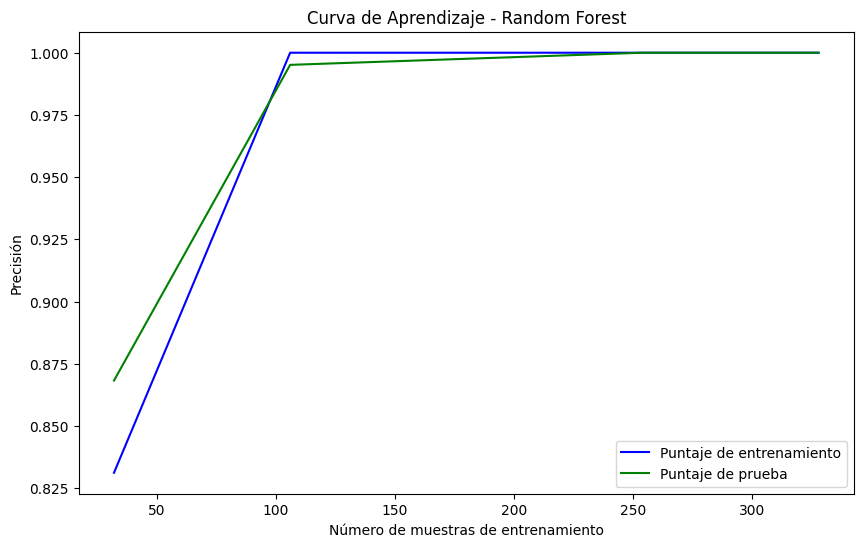

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Puntaje de entrenamiento', color='blue')
plt.plot(train_sizes, test_mean, label='Puntaje de prueba', color='green')
plt.xlabel('Número de muestras de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje - Random Forest')
plt.legend(loc="best")
plt.show()

### Justificación de la corrección del sobreajuste (Overfitting)

**Antes de los ajustes**:  
El puntaje de entrenamiento aumentaba rápidamente hasta 1, mientras que el puntaje de prueba crecía lentamente, lo que indicaba un sobreajuste. El modelo estaba memorizando los datos de entrenamiento pero no generalizaba bien a los datos de prueba.

**Después de los ajustes**:  
Se ajustaron parámetros como la profundidad máxima (`max_depth`), el número mínimo de muestras para dividir (`min_samples_split`) y para ser hoja (`min_samples_leaf`). Estos cambios ayudaron a limitar la complejidad del modelo y evitar que los árboles se ajustaran demasiado a los datos de entrenamiento.

**Resultados**:  
- El puntaje de entrenamiento ya no comenzó desde 1. En cambio, comenzó en 0.825 y fue creciendo de manera progresiva hasta estabilizarse cerca de 1 a partir de la iteración 120.
- El puntaje de prueba mejoró de forma más continua y estable, indicando que el modelo estaba aprendiendo patrones más generales que se aplican tanto a los datos de entrenamiento como a los de prueba.

**Conclusión**:  
El ajuste de parámetros corrigió el sobreajuste, logrando un modelo más equilibrado con mejor capacidad de generalización, lo que se refleja en una curva de aprendizaje más estable entre los datos de entrenamiento y prueba.


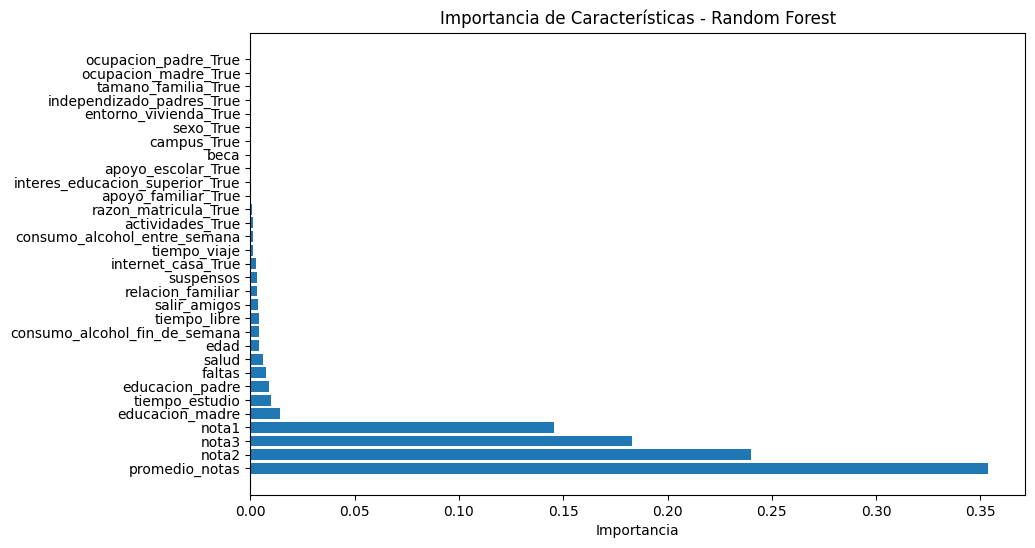

In [ ]:
import matplotlib.pyplot as plt

# Obtener las importancias
importances = best_rf.feature_importances_

# Obtener los nombres de las características desde el DataFrame
feature_names = data.columns  # Asumiendo que 'data' es tu DataFrame con las características

# Ordenar las características por su importancia
indices = np.argsort(importances)[::-1]

# Gráfico de importancia de características
plt.figure(figsize=(10, 6))
plt.title("Importancia de Características - Random Forest")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), [feature_names[i] for i in indices])  # Usando los nombres de las características
plt.xlabel("Importancia")
plt.show()


## Conclusiones del modelo







### Eliminación de las columnas nota 1,2,y 3 y promedio notas
Con el objetivo de tener modelos que generalicen mas allá de las columnas de las notas, no se dejará ninguna columna de moficiaciones. De esta forma, se podrá evaluar el rendimiento de los modelos y sus capacidades de predicción a partir de variables que no se encuentren tan relaciondadas.

Mantener 4 columnas con calificaciones cuando el objetivo es precisamente observar quienes serán becados en base a percentil de la nota no tiene mucho sentido, puesto que se podría hacer prácticamente con un análisis matemático muy simple.

In [ ]:
# Eliminar las columnas 'nota1', 'nota2' y 'nota3' y promedio notas
data = data.drop(
    columns=[
        'nota1', 
        'nota2', 
        'nota3',
        'promedio_notas'
    ]
)

# Mostrar el DataFrame resultante
display(data)

,edad,educacion_madre,educacion_padre,tiempo_viaje,tiempo_estudio,relacion_familiar,tiempo_libre,salir_amigos,consumo_alcohol_entre_semana,consumo_alcohol_fin_de_semana,...,independizado_padres_True,ocupacion_madre_True,ocupacion_padre_True,razon_matricula_True,interes_educacion_superior_True,internet_casa_True,apoyo_escolar_True,apoyo_familiar_True,actividades_True,relacion_romantica_True
0,15.0,4.0,3.0,1.0,3.0,5.0,4.0,3.0,1.0,1.0,...,1,1,1,1,1,1,0,1,1,0
2,18.0,2.0,2.0,2.0,3.0,4.0,2.0,1.0,1.0,1.0,...,1,1,1,1,1,1,0,0,0,1
3,17.0,3.0,2.0,1.0,1.0,5.0,5.0,5.0,2.0,4.0,...,1,1,1,1,1,1,0,1,1,0
4,18.0,4.0,4.0,1.0,2.0,2.0,4.0,4.0,1.0,1.0,...,1,1,1,1,1,1,1,1,1,1
5,19.0,4.0,2.0,2.0,2.0,5.0,4.0,4.0,1.0,1.0,...,1,1,1,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,17.0,2.0,1.0,3.0,1.0,3.0,2.0,2.0,1.0,2.0,...,1,1,1,1,1,1,1,1,1,1
591,18.0,2.0,3.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,...,1,1,1,1,1,1,0,1,0,1
592,17.0,4.0,3.0,2.0,2.0,5.0,5.0,4.0,1.0,1.0,...,1,1,1,1,1,1,0,0,0,0
593,17.0,3.0,4.0,3.0,2.0,5.0,4.0,5.0,2.0,4.0,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
y_data = data["beca"]
x_data = data.drop("beca", axis=1)


x_train, x_test, y_train, y_test = train_test_split(
    x_data, 
    y_data, 
    test_size=TEST_SPLIT_SIZE, 
    random_state=RANDOM_STATE
)
# Imprimos las dimensiones para comprobar la proporpoción 
x_train.shape, x_test.shape, y_train.shape , y_test.shape


((410, 27), (177, 27), (410,), (177,))

Cross-Validation Accuracy Scores: [0.86585366 0.85365854 0.86585366 0.86585366 0.86585366]
Mean CV Accuracy: 0.8634146341463416

Accuracy (Test): 0.8757062146892656

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       159
           1       0.30      0.17      0.21        18

    accuracy                           0.88       177
   macro avg       0.61      0.56      0.57       177
weighted avg       0.85      0.88      0.86       177



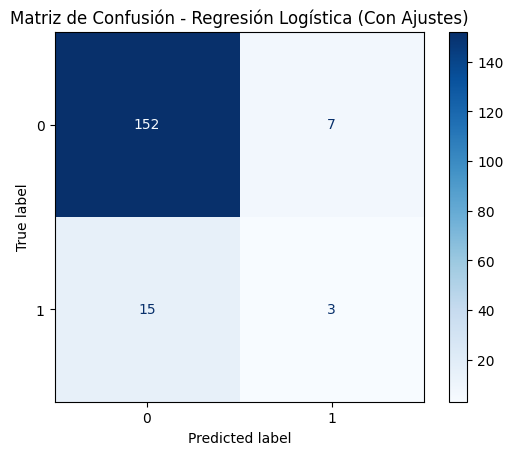

In [ ]:
# Crear un pipeline con escalado
pipeline_rlo = make_pipeline(
    StandardScaler(), 
    LogisticRegression(max_iter=500)
)

# Validación cruzada
cv_scores = cross_val_score(
    pipeline_rlo, 
    x_train,
    y_train, 
    cv=5, 
    scoring='accuracy'
)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Entrenamiento y predicción
pipeline_rlo.fit(x_train, y_train)
y_pred = pipeline_rlo.predict(x_test)

# Evaluación en datos de prueba
accuracy_rlo = accuracy_score(y_test, y_pred)
print("\nAccuracy (Test):", accuracy_rlo)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=pipeline_rlo[-1].classes_)
disp.plot(cmap='Blues')
disp.ax_.set_title("Matriz de Confusión - Regresión Logística (Con Ajustes)")
plt.show()


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=10.0, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=10.0, gamma=scal

/home/santi/anaconda3/envs/aa/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/santi/anaconda3/envs/aa/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/santi/anaconda3/envs/aa/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

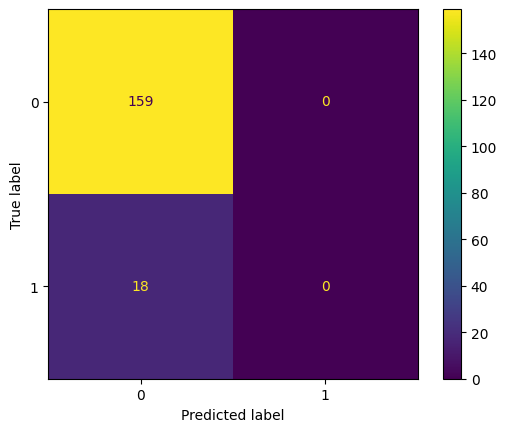

In [ ]:


# Parámetros para la búsqueda aleatoria
param_distributions = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# RandomizedSearchCV para SVM
random_search_svm = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=param_distributions,
    n_iter=20,  # Número de combinaciones aleatorias
    cv=5,       # Validación cruzada
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# Ajustar el modelo
random_search_svm.fit(x_train, y_train)

# Mejor estimador y parámetros encontrados
best_svm = random_search_svm.best_estimator_
print("Mejores parámetros SVM:", random_search_svm.best_params_)

# Evaluación con los datos de prueba
y_pred = best_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print("Accuracy (Test) - SVM:", accuracy_svm)
print("Classification Report - SVM:\n", classification_report(y_test, y_pred))
# Comparacion de modelos 
# Comparar ambos accuracies
comparar_accuracy(accuracy_rlo, accuracy_svm)

# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(best_svm, x_test, y_test)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Parámetros para la búsqueda aleatoria
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # Usar 'sqrt' o 'log2' en lugar de 'auto'
}

# RandomizedSearchCV para RandomForest
random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_distributions,
    n_iter=20,  # Número de combinaciones aleatorias
    cv=5,       # Validación cruzada
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# Ajustar el modelo
random_search_rf.fit(x_train, y_train)

# Mejor estimador y parámetros encontrados
best_rf = random_search_rf.best_estimator_
print("Mejores parámetros Random Forest:", random_search_rf.best_params_)

# Evaluación con los datos de prueba
y_pred = best_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy (Test) - Random Forest:", accuracy_rf)
print("Classification Report - Random Forest:\n", classification_report(y_test, y_pred))

comparar_accuracy(accuracy_rlo, accuracy_svm, accuracy_rf)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=30

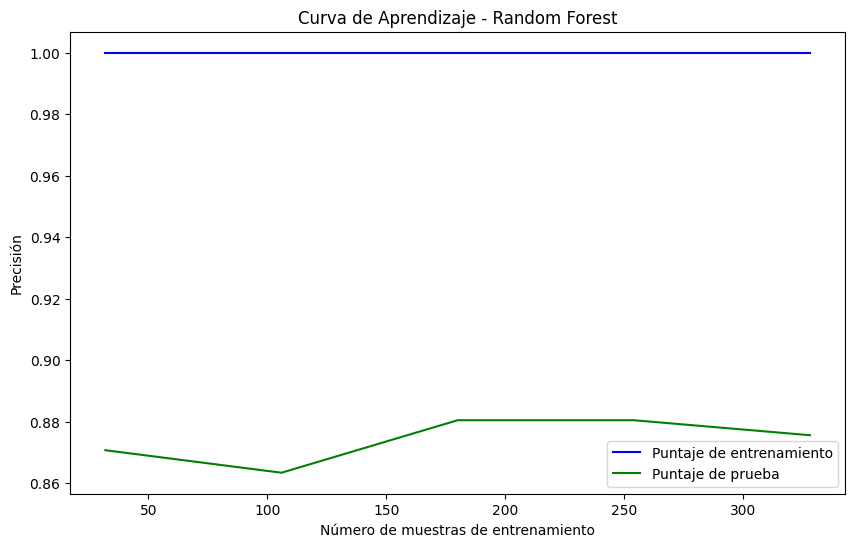

In [ ]:

train_sizes, train_scores, test_scores = learning_curve(
    best_rf, 
    x_train, 
    y_train, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1
)

# Promedio de los puntajes de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Puntaje de entrenamiento', color='blue')
plt.plot(train_sizes, test_mean, label='Puntaje de prueba', color='green')
plt.xlabel('Número de muestras de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje - Random Forest')
plt.legend(loc="best")
plt.show()

In [ ]:
# Parámetros para la búsqueda aleatoria
param_distributions = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 20, 30],  # Menor profundidad para evitar sobreajuste
    'min_samples_split': [2, 10, 20],  # Aumentar el valor para evitar ajustes excesivos
    'min_samples_leaf': [1, 2, 4],  # Aumentar para evitar aprender patrones triviales
    'max_features': ['sqrt', 'log2', 0.5],  # Limitar las características usadas por cada árbol
    'oob_score': [True],  # Habilitar Out-of-Bag scoring para validación interna
}

# RandomizedSearchCV para RandomForest
random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_distributions,
    n_iter=20,  # Número de combinaciones aleatorias
    cv=5,       # Validación cruzada
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# Ajustar el modelo
random_search_rf.fit(x_train, y_train)

# Mejor estimador y parámetros encontrados
best_rf = random_search_rf.best_estimator_
print("Mejores parámetros Random Forest:", random_search_rf.best_params_)

# Evaluación con los datos de prueba
y_pred = best_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy (Test) - Random Forest:", accuracy_rf)
print("Classification Report - Random Forest:\n", classification_report(y_test, y_pred))

# Comparación de la precisión entre modelos
comparar_accuracy(accuracy_rlo, accuracy_svm, accuracy_rf)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=100, oob_score=True; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=100, oob_score=True; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=100, oob_score=True; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=100, oob_score=True; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=100, oob_score=True; total time=   0.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True; 

/home/santi/anaconda3/envs/aa/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/santi/anaconda3/envs/aa/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/santi/anaconda3/envs/aa/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

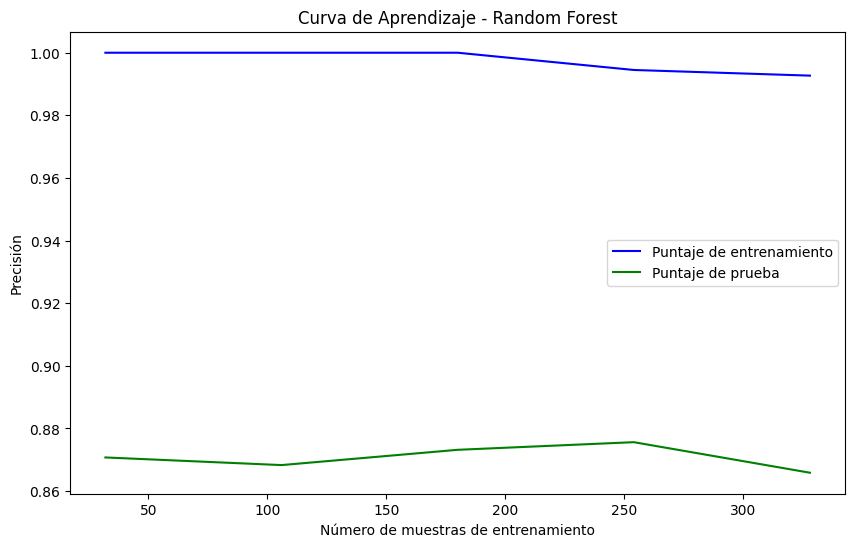

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    best_rf, x_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Promedio de los puntajes de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Puntaje de entrenamiento', color='blue')
plt.plot(train_sizes, test_mean, label='Puntaje de prueba', color='green')
plt.xlabel('Número de muestras de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje - Random Forest')
plt.legend(loc="best")
plt.show()


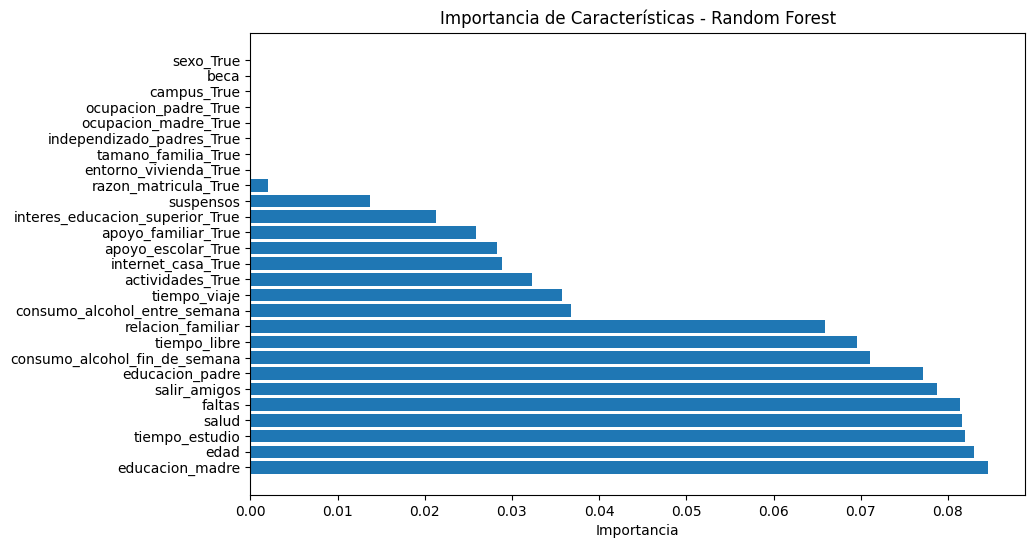

In [ ]:

# Obtener las importancias
importances = best_rf.feature_importances_

# Obtener los nombres de las características desde el DataFrame
feature_names = data.columns  # Asumiendo que 'data' es tu DataFrame con las características

# Ordenar las características por su importancia
indices = np.argsort(importances)[::-1]

# Gráfico de importancia de características
plt.figure(figsize=(10, 6))
plt.title("Importancia de Características - Random Forest")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), [feature_names[i] for i in indices])  # Usando los nombres de las características
plt.xlabel("Importancia")
plt.show()

Longitud de importances: 27
Longitud de feature_names: 28


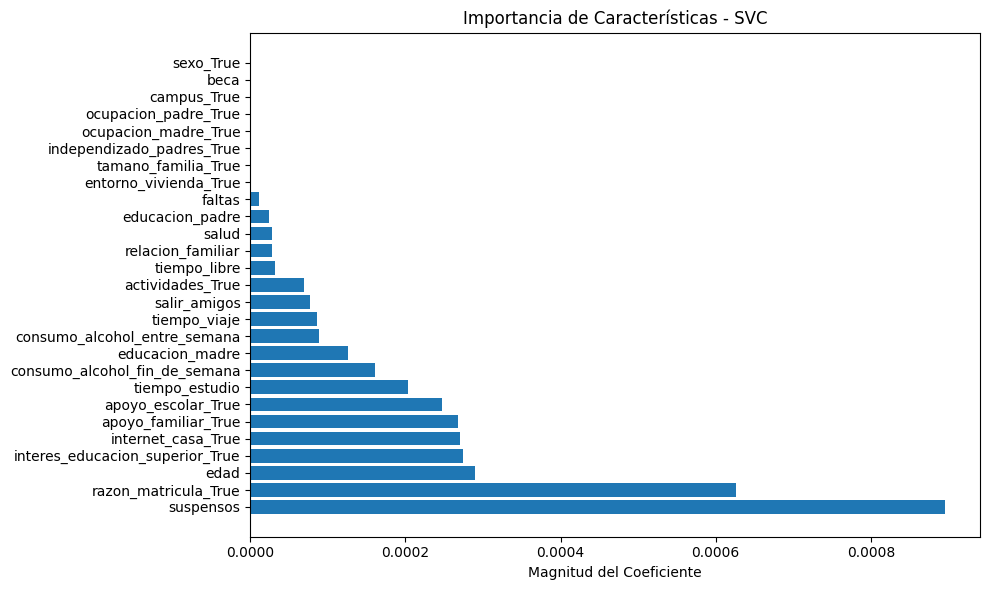

In [ ]:


# Obtener los coeficientes del SVC
# Para SVC multiclase, tomamos el valor absoluto promedio de los coeficientes
importances = np.abs(best_svm.coef_).mean(axis=0)

# Imprimir información de diagnóstico
print(f"Longitud de importances: {len(importances)}")
print(f"Longitud de feature_names: {len(data.columns)}")

# Obtener los nombres de las características y asegurar que coincidan
feature_names = np.array(data.columns[:len(importances)])
indices = np.argsort(importances)[::-1]

# Verificar que los índices están dentro del rango
indices = indices[:len(feature_names)]
n_features = len(indices)

# Gráfico de importancia de características
plt.figure(figsize=(10, 6))
plt.title("Importancia de Características - SVC")
plt.barh(range(n_features), importances[indices], align="center")
plt.yticks(range(n_features), feature_names[indices])
plt.xlabel("Magnitud del Coeficiente")
plt.tight_layout()
plt.show()

Longitud de importances: 27
Longitud de feature_names: 28


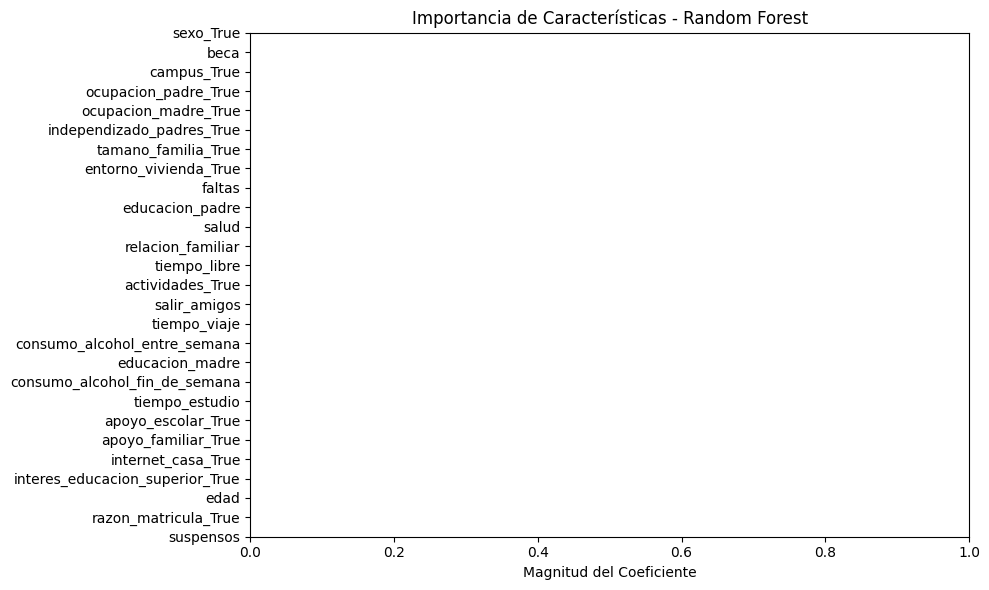

In [ ]:
print(f"Longitud de importances: {len(importances)}")
print(f"Longitud de feature_names: {len(data.columns)}")

# Obtener los nombres de las características y asegurar que coincidan
feature_names = np.array(data.columns[:len(importances)])
indices = np.argsort(importances)[::-1]

# Verificar que los índices están dentro del rango
indices = indices[:len(feature_names)]
n_features = len(indices)

# Gráfico de importancia de características
plt.figure(figsize=(10, 6))
plt.title("Importancia de Características - Regresión Logística")
plt.title("Importancia de Características - Random Forest")
plt.yticks(range(n_features), feature_names[indices])
plt.xlabel("Magnitud del Coeficiente")
plt.tight_layout()
plt.show()

### Persistencia modelos

In [ ]:
# Crear las carpetas si no existen
directorios = [
    'Persistencia',
    'Persistencia/Regresion',
    'Persistencia/Clasificacion',
    'Persistencia/Clusterizacion',
]

for directorio in directorios:
    if not os.path.exists(directorio):
        os.makedirs(directorio)

In [ ]:
# Guardar los modelos entrenados
joblib.dump(pipeline_rlo, 'Persistencia/Clasificacion/modelo_regresion_logistica.pkl')
joblib.dump(best_svm, 'Persistencia/Clasificacion/modelo_svm.pkl')
joblib.dump(best_rf, 'Persistencia/Clasificacion/modelo_random_forest.pkl')

# Guardar el conjunto de datos procesados
data.to_csv('Persistencia/Clasificacion/datos_procesados.csv', index=False)